<a href="https://colab.research.google.com/github/mariliabrito/gunviolence/blob/main/Violencia_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Violência Escolar</font>
## <font color ="#00b8ff">Trainees - 2022.2</font>

## <font color ="#00b8ff">1. Introdução</font>
**Equipe:** Marília Brito, Jonas, Gisele, Hermano Neto, João Victor Dantas, Maria Eduarda Bandeira, Raffael Leobino

 FOTO 

## Introdução 

Após a ocorrência de dois massacres em território brasileiro no intervalo de uma semana, o tema em questão recebeu grande destaque. O país alarmou-se diante de ameaças e possíveis novos ataques. Diante dessa situação, levantou-se diversos questionamentos quanto à natureza dessas ocorrências.

Segundo um mapeamento da Universidade Estadual de Campinas (Unicamp) sobre casos de ataques em escolas por alunos ou ex-alunos, o primeiro episódio foi registrado em 2002, quando um adolescente de 17 anos disparou contra duas colegas dentro da sala de aula de uma escola particular de Salvador. Desde esse caso, foram contabilizados 22 ataques, 13 deles realizados nos últimos dois anos.

A fim de compreender o fenômeno, suas causas e possíveis formas de proteção, a equipe de Trainees resolveu analisar um dataset de violência escolar. Foi escolhida uma base norte-americana, visto que essa totaliza uma maior quantidade de dados, 2069 ocorrências, de 1970 até junho de 2022, e possui mais variáveis para estudo. 

O dataset foi obtido através do Center for Homeland, Defense
and Security (School Shooting Safety Compendium) e todos os casos apresentam link da nóticia/registro, de forma a garantir sua confiabilidade.

## Objetivos gerais 
Extrair informações relevantes sobre a temática
de violência nas escolas envolvendo violentadores;

## Objetivos específicos
* Observar tendência ao longo do tempo;
* Identificar perfil do violentador e da vítima;
* Extrair possíveis fatores de risco e proteção;
* Realizar análise preditiva.

### Colunas do dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando 4 abas do arquivo de excel

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1)
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2)
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3)
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4)

## <font color ="#00b8ff">2. Limpeza</font>

Realizar limpeza e uniformização do dataset. Também é possível juntar datasets pela coluna incidentid.

## <font color ="#00b8ff">3. Análise Descritiva</font>

Realizar análise do dataset, mostrar série histórica, trazer visualizações, etc

### <font color ="#00b8ff">3.1 Análise de série histórica e geográfica</font>

### <font color ="#00b8ff">3.2 Análise dos Incidentes</font>

In [3]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [4]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Incident_ID         2069 non-null   object
 1   Sources             2069 non-null   object
 2   Number_News         694 non-null    object
 3   Media_Attention     734 non-null    object
 4   Reliability         2069 non-null   int64 
 5   Date                2069 non-null   object
 6   Quarter             2058 non-null   object
 7   School              2068 non-null   object
 8   City                2069 non-null   object
 9   State               2069 non-null   object
 10  School_Level        2045 non-null   object
 11  Location            2066 non-null   object
 12  Location_Type       2064 non-null   object
 13  During_School       2047 non-null   object
 14  Time_Period         1905 non-null   object
 15  First_Shot          1594 non-null   object
 16  Summary             2069

In [5]:
df_incid.describe()

,Reliability
count,2069.000000
mean,2.766554
std,0.996184
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,5.000000


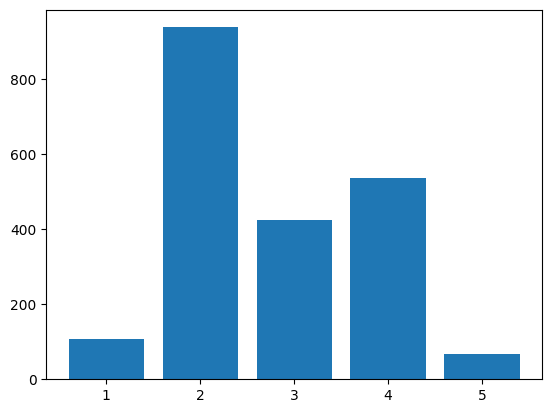

In [6]:
df_incid['Reliability'].value_counts()
confiabilidade = df_incid['Reliability'].value_counts()
plt.bar(confiabilidade.index, confiabilidade.values)
plt.show()

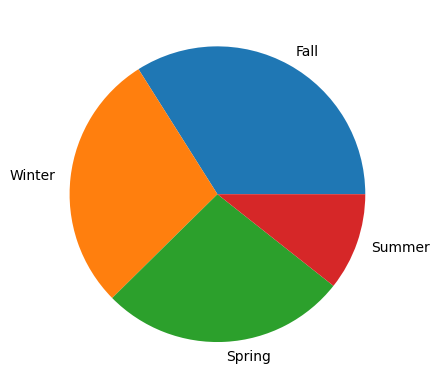

In [7]:
df_incid['Quarter'].value_counts()
temporada = df_incid['Quarter'].value_counts()
plt.pie(temporada.values, labels = temporada.index)
plt.show()

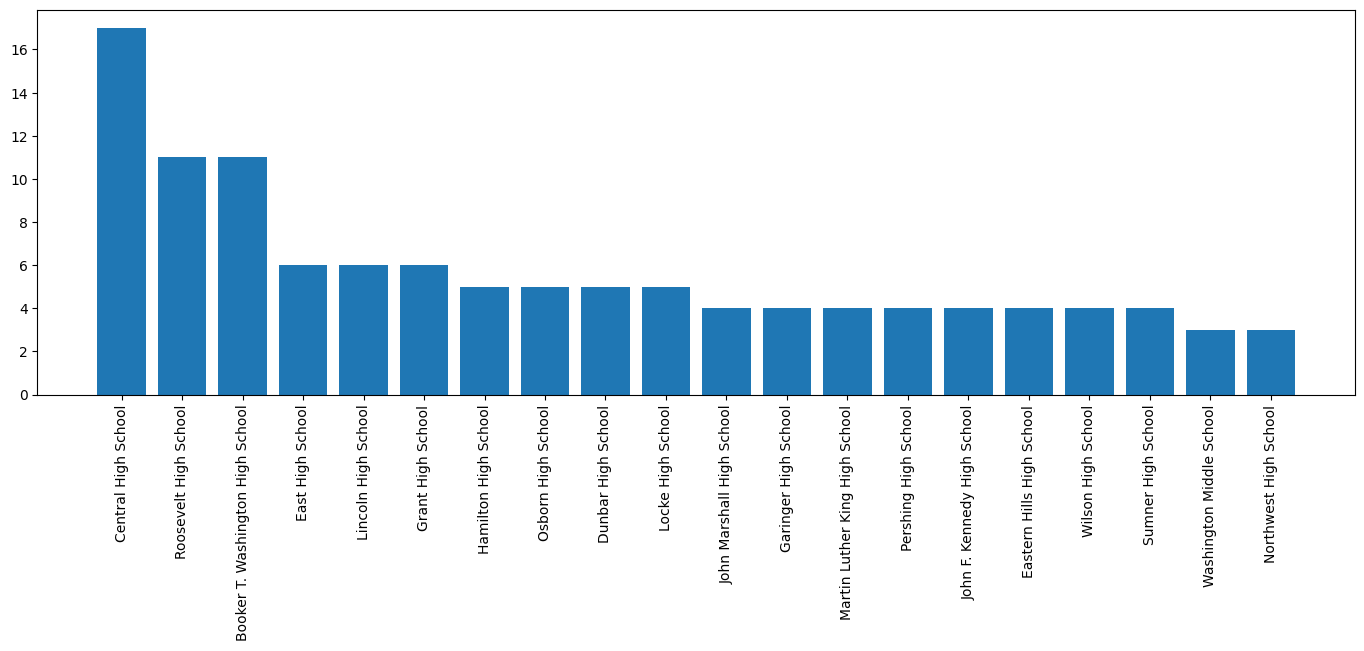

In [8]:
escola20 = df_incid['School'].value_counts().head(20)
fig = plt.figure(figsize=(17, 5))
plt.bar(escola20.index, escola20.values)
plt.xticks(rotation=90)
plt.show()

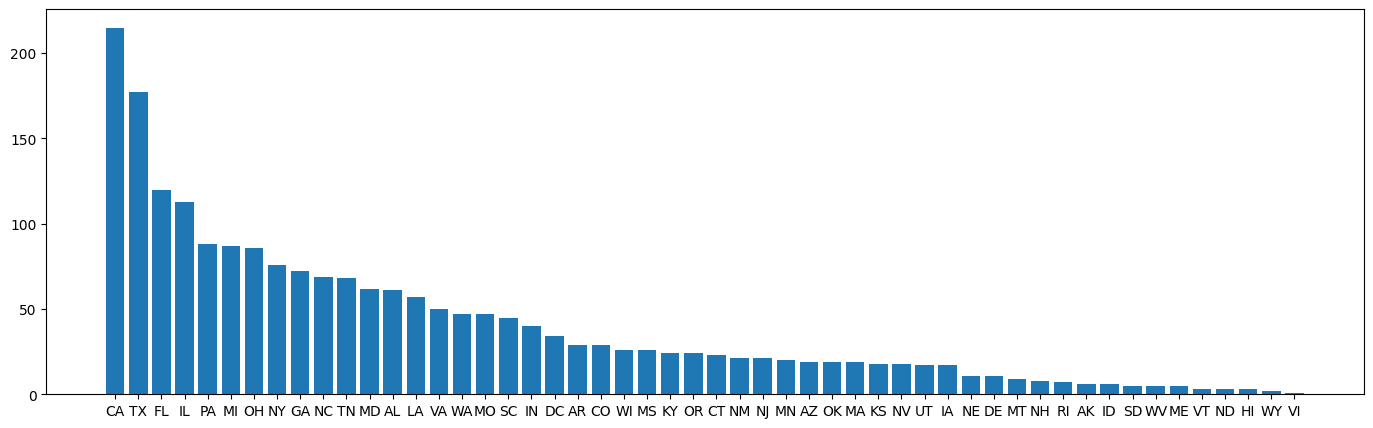

In [9]:
fig = plt.figure(figsize=(17, 5))
estados = df_incid['State'].value_counts()
plt.bar(estados.index, estados.values)
plt.show()

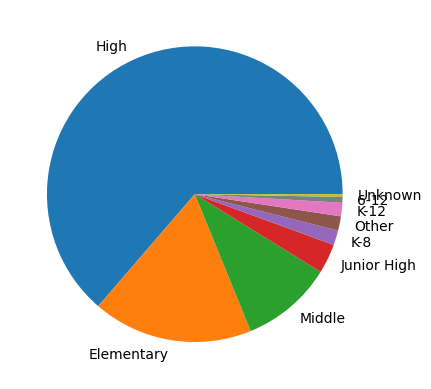

In [10]:
escolaridade = df_incid['School_Level'].value_counts()
plt.pie(escolaridade.values, labels = escolaridade.index)
plt.show()

### <font color ="#00b8ff">3.3 Análise do Violentador</font>

In [11]:
df_shoot.head()

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN
3,20220609ALWAG,NaN,NaN,NaN,Police Officer/SRO,Law Enforcement,No,None,NaN,NaN,NaN,NaN
4,20220608ARLIL,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN


### <font color ="#00b8ff">3.4 Análise das Vítimas</font>

In [12]:
df_victm.head()

,incidentid,race,injury,gender,schoolaffiliation,age
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17
3,20220609ALWAG,Black,Fatal,Male,No Relation,32
4,20220605INWEG,NaN,Wounded,Male,NaN,19


### <font color ="#00b8ff">3.5 Análise das Armas</font>

In [13]:
df_weapn.head()

,incidentid,weaponcaliber,weapondetails,weapontype
0,20220620ILGRC,NaN,NaN,NaN
1,20220613WAMAE,NaN,NaN,Handgun
2,20220610ALBYB,NaN,NaN,Handgun
3,20220609ALWAG,Service Weapon,NaN,Handgun
4,20220608ARLIL,NaN,NaN,NaN


### <font color ="#00b8ff">3.6 Regressão Linear</font>